# Fish Market Dataset - Machine Learning Model

## Step 1: Load and Explore Dataset

In [86]:
import pandas as pd

# Load dataset
df = pd.read_csv("Fish.csv")

# Display first few rows
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [87]:
df[-10:]

,Species,Weight,Length1,Length2,Length3,Height,Width
149,Smelt,9.8,10.7,11.2,12.4,2.0832,1.2772
150,Smelt,8.7,10.8,11.3,12.6,1.9782,1.2852
151,Smelt,10.0,11.3,11.8,13.1,2.2139,1.2838
152,Smelt,9.9,11.3,11.8,13.1,2.2139,1.1659
153,Smelt,9.8,11.4,12.0,13.2,2.2044,1.1484
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [88]:
df['Species'].value_counts().index

Index(['Perch', 'Bream', 'Roach', 'Pike', 'Smelt', 'Parkki', 'Whitefish'], dtype='object', name='Species')

In [89]:

# Check data types and missing values
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


,0
Species,0
Weight,0
Length1,0
Length2,0
Length3,0
Height,0
Width,0


## Step 2: Exploratory Data Analysis (EDA)

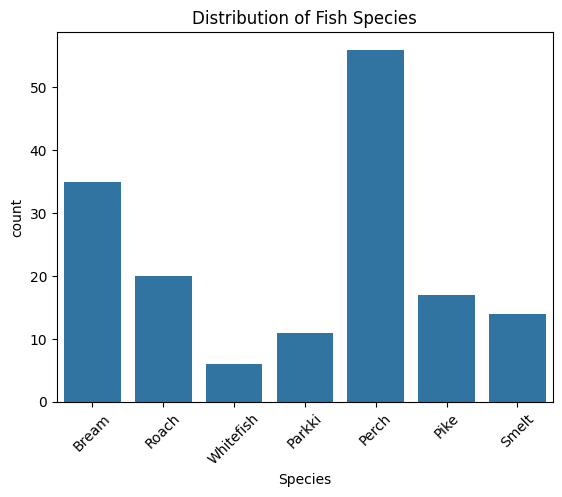

In [90]:

import matplotlib.pyplot as plt
import seaborn as sns

# Check distribution of fish species
sns.countplot(x='Species', data=df)
plt.xticks(rotation=45)
plt.title("Distribution of Fish Species")
plt.show()


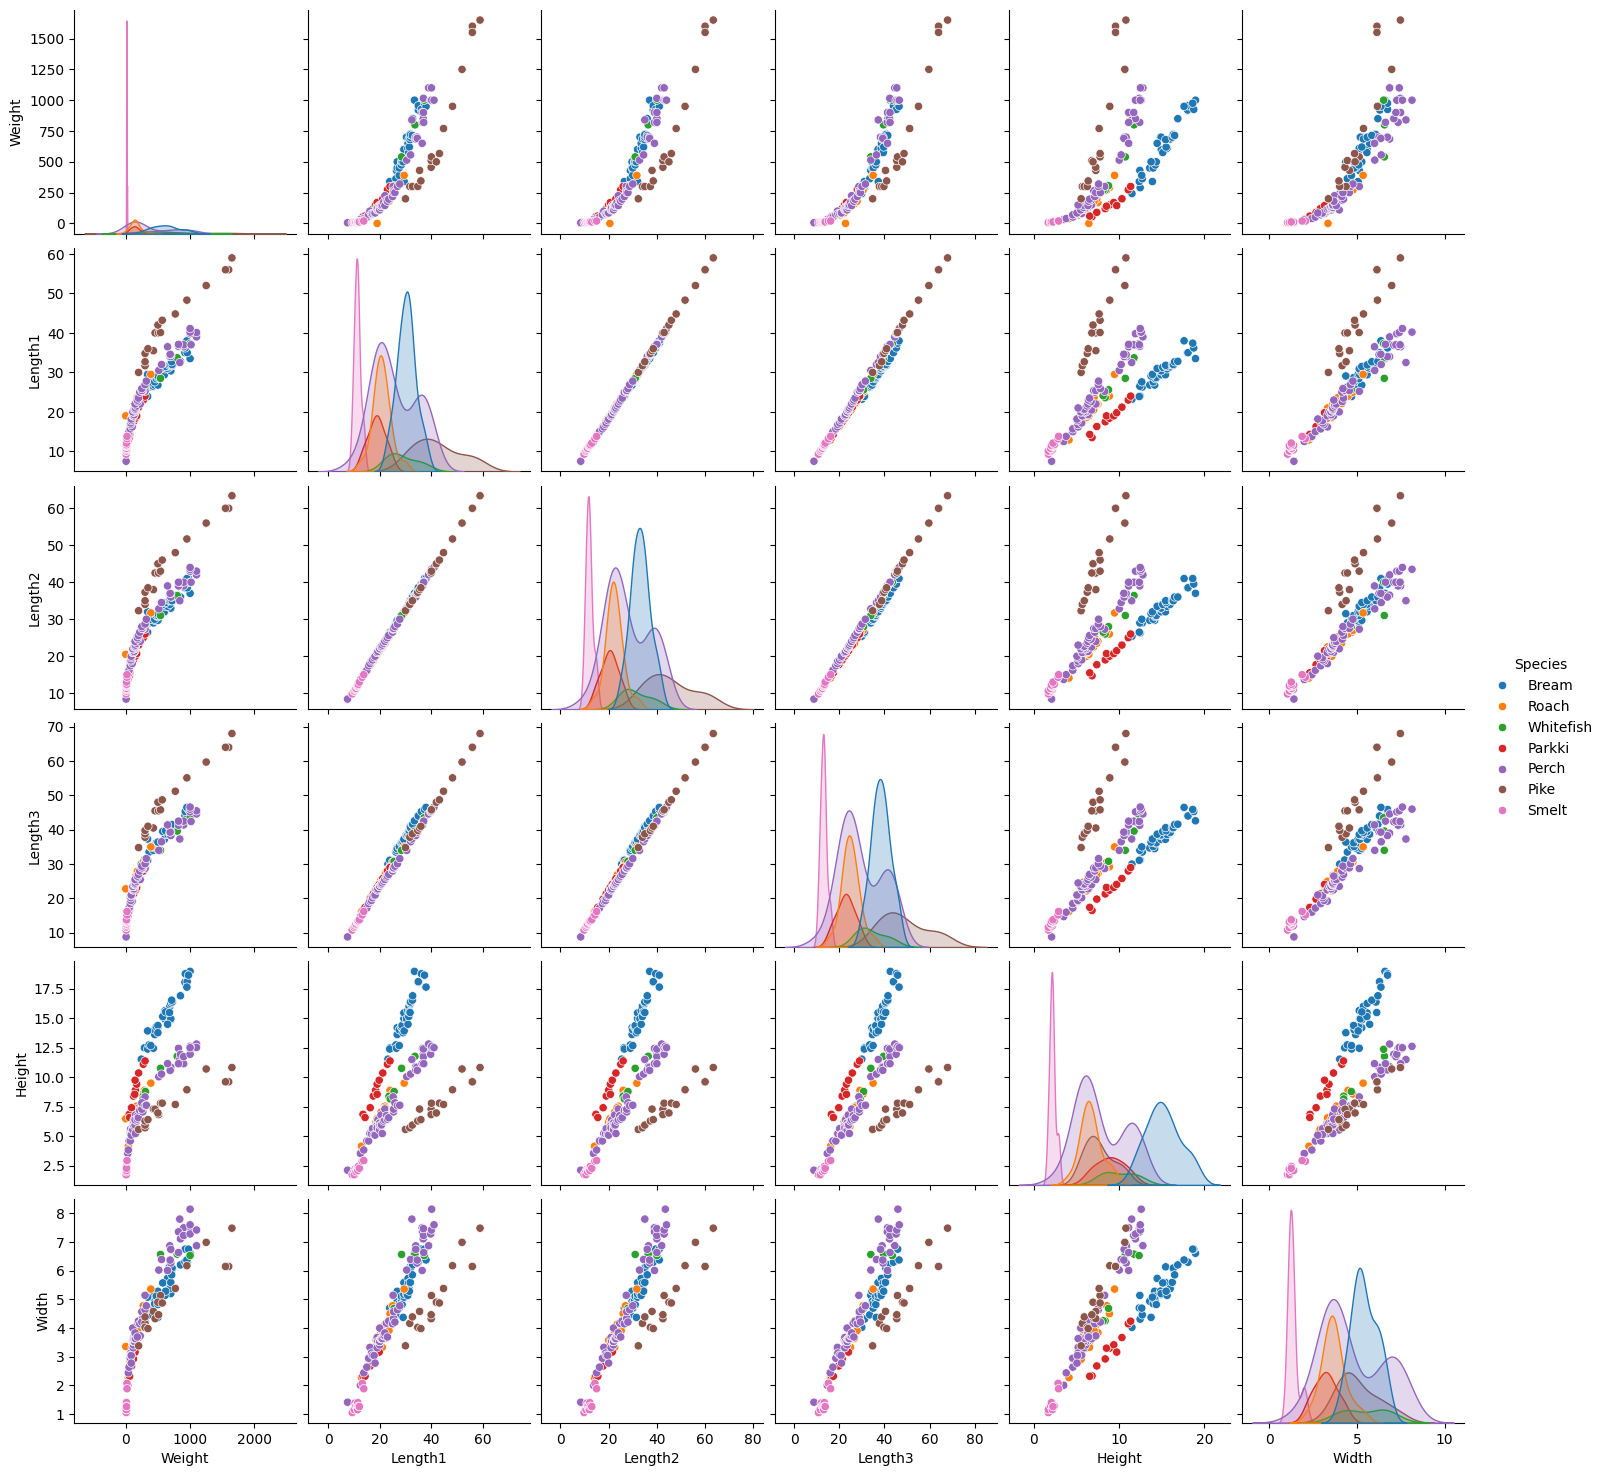

In [91]:

# Pairplot to visualize relationships
sns.pairplot(df, hue="Species")
plt.show()


## Step 3: Data Preprocessing

In [92]:

from sklearn.preprocessing import LabelEncoder

# Encode species labels
encoder = LabelEncoder()
df['Species_enc'] = encoder.fit_transform(df['Species'])


## Step 4: Train Regression Model (Predicting Weight)

In [93]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Species_enc
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,0


In [94]:
df['Species'].value_counts().index

Index(['Perch', 'Bream', 'Roach', 'Pike', 'Smelt', 'Parkki', 'Whitefish'], dtype='object', name='Species')

In [95]:
df_encoded = pd.get_dummies(df)

In [96]:
df_encoded

,Weight,Length1,Length2,Length3,Height,Width,Species_enc,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0,True,False,False,False,False,False,False
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0,True,False,False,False,False,False,False
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0,True,False,False,False,False,False,False
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0,True,False,False,False,False,False,False
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,5,False,False,False,False,False,True,False
155,13.4,11.7,12.4,13.5,2.4300,1.2690,5,False,False,False,False,False,True,False
156,12.2,12.1,13.0,13.8,2.2770,1.2558,5,False,False,False,False,False,True,False
157,19.7,13.2,14.3,15.2,2.8728,2.0672,5,False,False,False,False,False,True,False


In [97]:

from sklearn.model_selection import train_test_split

# Define features (X) and target (y) for regression
X = df_encoded.drop(columns=["Weight","Species_enc"])
y = df_encoded["Weight"]


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
X_train.columns

Index(['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Species_Bream',
       'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach',
       'Species_Smelt', 'Species_Whitefish'],
      dtype='object')

In [99]:
len(X_train.columns)

12

In [100]:
# scaler test
#  X_scaled = scaler.transform(X)
#X[['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Species_enc']] = X_scaled


In [101]:
X.head()

,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,23.2,25.4,30.0,11.5200,4.0200,True,False,False,False,False,False,False
1,24.0,26.3,31.2,12.4800,4.3056,True,False,False,False,False,False,False
2,23.9,26.5,31.1,12.3778,4.6961,True,False,False,False,False,False,False
3,26.3,29.0,33.5,12.7300,4.4555,True,False,False,False,False,False,False
4,26.5,29.0,34.0,12.4440,5.1340,True,False,False,False,False,False,False


In [102]:
X_train.head()

,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
75,15.0,16.2,17.2,4.5924,2.6316,False,False,True,False,False,False,False
138,43.2,46.0,48.7,7.7920,4.8700,False,False,False,True,False,False,False
2,23.9,26.5,31.1,12.3778,4.6961,True,False,False,False,False,False,False
86,20.0,22.0,23.5,6.1100,3.4075,False,False,True,False,False,False,False
45,20.5,22.5,25.3,7.0334,3.8203,False,False,False,False,True,False,False


In [103]:
from sklearn.preprocessing import StandardScaler

#inputs species Length1 Length2 Length3 Height Width , to be scaled
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [104]:
X_train_scaled[:10]

array([[-1.13082956, -1.14878727, -1.22092909, -1.06273398, -1.10441696,
        -0.49507377, -0.29235267,  1.30465615, -0.35198552, -0.41943525,
        -0.27617239, -0.15554275],
       [ 1.70924967,  1.65907911,  1.53608537, -0.25944123,  0.27042307,
        -0.49507377, -0.29235267, -0.76648549,  2.84102597, -0.41943525,
        -0.27617239, -0.15554275],
       [-0.2344925 , -0.17828312, -0.00434176,  0.89187139,  0.16361254,
         2.01990099, -0.29235267, -0.76648549, -0.35198552, -0.41943525,
        -0.27617239, -0.15554275],
       [-0.62726941, -0.60228979, -0.6695262 , -0.68172477, -0.62785406,
        -0.49507377, -0.29235267,  1.30465615, -0.35198552, -0.41943525,
        -0.27617239, -0.15554275],
       [-0.5769134 , -0.55517794, -0.51198251, -0.44989563, -0.37430959,
        -0.49507377, -0.29235267, -0.76648549, -0.35198552,  2.38415824,
        -0.27617239, -0.15554275],
       [-0.68769663, -0.69651349, -0.65202134, -0.68056989, -0.69738225,
        -0.49507377, -

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 65.3000515335739
Mean Squared Error: 7007.383189853871
R-squared Score: 0.9507352480054517


## Save regression model

In [106]:
#save encoder
import joblib
import pickle
joblib.dump(encoder, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(model,'reg_model_fish.pkl')

['reg_model_fish.pkl']

In [107]:
loaded_encoder = joblib.load('/content/label_encoder.pkl')
loaded_scaler = joblib.load('/content/scaler.pkl')
loaded_model = joblib.load('/content/reg_model_fish.pkl')